### Checklist for submission

It is extremely important to make sure that:

1. Everything runs as expected (no bugs when running cells);
2. The output from each cell corresponds to its code (don't change any cell's contents without rerunning it afterwards);
3. All outputs are present (don't delete any of the outputs);
4. Fill in all the places that say `# YOUR CODE HERE`, or "**Your answer:** (fill in here)".
5. Never copy/paste any notebook cells. Inserting new cells is allowed, but it should not be necessary.
6. The notebook contains some hidden metadata which is important during our grading process. **Make sure not to corrupt any of this metadata!** The metadata may for example be corrupted if you copy/paste any notebook cells, or if you perform an unsuccessful git merge / git pull. It may also be pruned completely if using Google Colab, so watch out for this. Searching for "nbgrader" when opening the notebook in a text editor should take you to the important metadata entries.
7. Although we will try our very best to avoid this, it may happen that bugs are found after an assignment is released, and that we will push an updated version of the assignment to GitHub. If this happens, it is important that you update to the new version, while making sure the notebook metadata is properly updated as well. The safest way to make sure nothing gets messed up is to start from scratch on a clean updated version of the notebook, copy/pasting your code from the cells of the previous version into the cells of the new version.
8. If you need to have multiple parallel versions of this notebook, make sure not to move them to another directory.
9. Although not forced to work exclusively in the course `conda` environment, you need to make sure that the notebook will run in that environment, i.e. that you have not added any additional dependencies.

**FOR HA1, HA2, HA3 ONLY:** Failing to meet any of these requirements might lead to either a subtraction of POEs (at best) or a request for resubmission (at worst).

We advise you to perform the following steps before submission to ensure that requirements 1, 2, and 3 are always met: **Restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). This might require a bit of time, so plan ahead for this (and possibly use a cloud GPU in HA1 and HA2 for this step). Finally press the "Save and Checkout" button before handing in, to make sure that all your changes are saved to this .ipynb file.

### Fill in name of notebook file
This might seem silly, but the version check below needs to know the filename of the current notebook, which is not trivial to find out programmatically.

You might want to have several parallel versions of the notebook, and it is fine to rename the notebook as long as it stays in the same directory. **However**, if you do rename it, you also need to update its own filename below:

In [24]:
nb_fname = "IHA2.ipynb"

### Fill in group number and member names (use NAME2 and GROUP only for HA1, HA2 and HA3):

In [25]:
NAME1 = "Nicholas Granlund" 
NAME2 = ""
GROUP = ""

### Check Python version

In [26]:
from platform import python_version_tuple
assert python_version_tuple()[:2] == ('3','9'), "You are not running Python 3.9. Make sure to run Python through the course Conda environment."

### Check that notebook server has access to all required resources, and that notebook has not moved

In [27]:
import os
nb_dirname = os.path.abspath('')
assignment_name = os.path.basename(nb_dirname)
assert assignment_name in ['IHA1', 'IHA2', 'HA1', 'HA2', 'HA3'], \
    '[ERROR] The notebook appears to have been moved from its original directory'

### Verify correct nb_fname

In [28]:
from IPython.display import display, HTML
try:
    display(HTML(r'<script>if("{nb_fname}" != IPython.notebook.notebook_name) {{ alert("You have filled in nb_fname = \"{nb_fname}\", but this does not seem to match the notebook filename \"" + IPython.notebook.notebook_name + "\"."); }}</script>'.format(nb_fname=nb_fname)))
except NameError:
    assert False, 'Make sure to fill in the nb_fname variable above!'

### Verify that your notebook is up-to-date and not corrupted in any way

In [29]:
import sys
sys.path.append('..')
from ha_utils import check_notebook_uptodate_and_not_corrupted
check_notebook_uptodate_and_not_corrupted(nb_dirname, nb_fname)

Matching current notebook against the following URL:
http://raw.githubusercontent.com/dml-cth/deep-machine-learning/master/home-assignments/IHA2/IHA2.ipynb
[SUCCESS] No major notebook mismatch found when comparing to latest GitHub version. (There might be minor updates, but even that is the case, submitting your work based on this notebook version would be acceptable.)


# IHA2 - Catching Pokemon

![](http://tibetanitech.com/wp-content/uploads/2016/09/Pokemon-GO.jpg)

In this home assignment, you'll apply roughly the same principles we used when doing logistic regression on the Iris dataset in Computer Lab 1, but on a new and very interesting dataset. We'll use the [Predict'em All dataset from Kaggle](https://www.kaggle.com/semioniy/predictemall). You can download the dataset from Kaggle but you will need a Kaggle account. This dataset consists of roughly 293,000 [pokemon](http://www.pokemongo.com/) sightings (historical appearances of Pokemon in the Pokemon Go game), with geographical coordinates, time, weather, population density, distance to pokestops/gyms etc. as features. A comprehensive list of all the features is available at [the dataset's homepage](https://www.kaggle.com/semioniy/predictemall)

The context is simple: you are a Pokemon hunter, and there are only three Pokemon left for you to complete your collection. You'll do anything to capture them, including changing where you'll spend your next holidays! You know that some Pokemon only spawn in certain places of the world. Since you like machine learning so much, you figure it would be a great idea to train a classifier that, based on a location's latitude and longitude, can tell us which Pokemon is more likely to appear there.

The assignment is broken down into six steps.

1. Loading the data and extracting the desired subset of it
2. Visualization of the dataset
3. Preprocessing
4. Training
5. Evaluation
6. Exploration


Feel free to add cells wherever you see fit, and play around with this notebook as much as you want when developing the solutions. However, the solution you upload to Canvas must have the exact format shown here, with only the cells present here.

Don't restrict yourself only to what was taught so far. Some of the tasks might require you to search for new information. However, **be sure that you do the assignment using PyTorch** since we will be using it through the following assignments as well. [The python docs](https://docs.python.org/3/), [pytorch docs](https://pytorch.org/docs/stable/index.html), [stackoverflow](https://stackoverflow.com/), and Google are your friends!

**Hint:** Solving Computer Lab 1 (CL1) is a good way to get prepared for this assignment.

## 0. Imports

Import any necessary modules here.

In [50]:
# YOUR CODE HERE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Loading and extracting subset

The first step consists of filtering the dataset by the three pokemon you are interested at. 

Start by loading the `'300k.csv'` file using pandas. If you haven't downloaded it yet, use [this link](https://www.kaggle.com/semioniy/predictemall) to do so. 

In [32]:
# YOUR CODE HERE
df = pd.read_csv('archive/300k_csv/300k.csv')

/var/folders/vw/fdrl_85534sdc5svv3301tsw0000gn/T/ipykernel_15886/3657786535.py:2: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('archive/300k_csv/300k.csv')


Create a new `DataFrame` with only the columns `latitude`, `longitude`, and `class`.

In [36]:
# YOUR CODE HERE
new_df = df[['latitude','longitude','class']]
print(new_df)

         latitude   longitude  class
0       20.525745  -97.460829     16
1       20.523695  -97.461167    133
2       38.903590  -77.199780     16
3       47.665903 -122.312561     13
4       47.666454 -122.311628    133
...           ...         ...    ...
296016  39.119052  -76.633194     19
296017  47.142237    7.244752     13
296018  42.258532  -87.881248     16
296019  26.230929  -98.194772     19
296020  50.144272   14.101178     96

[296021 rows x 3 columns]


Note that the `class` column specifies which pokemon it is. However, it only has the numerical id of the pokemon. For convenience, use the following dictionary to convert between ids and names.

In [37]:
name_dict={1: 'Bulbasaur', 2: 'Ivysaur', 3: 'Venusaur', 4: 'Charmander', 5: 'Charmeleon', 6: 'Charizard', 7: 'Squirtle', 8: 
          'Wartortle', 9: 'Blastoise', 10: 'Caterpie', 11: 'Metapod', 12: 'Butterfree', 13: 'Weedle', 14: 'Kakuna', 
          15: 'Beedrill', 16: 'Pidgey', 17: 'Pidgeotto', 18: 'Pidgeot', 19: 'Rattata', 20: 'Raticate', 21: 'Spearow',
          22: 'Fearow', 23: 'Ekans', 24: 'Arbok', 25: 'Pikachu', 26: 'Raichu', 27: 'Sandshrew', 28: 'Sandslash', 
          29: 'Nidoran F', 30: 'Nidorina', 31: 'Nidoqueen',32: 'Nidoran M', 33: 'Nidorino', 34: 'Nidoking', 35: 'Clefairy',
          36: 'Clefable', 37: 'Vulpix', 38: 'Ninetales', 39: 'Jigglypuff', 40: 'Wigglytuff', 41: 'Zubat', 42: 'Golbat', 
          43: 'Oddish', 44: 'Gloom', 45: 'Vileplume', 46: 'Paras', 47: 'Parasect', 48: 'Venonat', 49: 'Venomoth',
          50: 'Diglett', 51: 'Dugtrio', 52: 'Meowth', 53: 'Persian', 54: 'Psyduck',55: 'Golduck', 56: 'Mankey', 
          57: 'Primeape', 58: 'Growlithe', 59: 'Arcanine', 60: 'Poliwag', 61: 'Poliwhirl', 62: 'Poliwrath',
          63: 'Abra', 64: 'Kadabra', 65: 'Alakazam', 66: 'Machop', 67: 'Machoke', 68: 'Machamp', 69: 'Bellsprout', 
          70: 'Weepinbell', 71: 'Victreebel', 72: 'Tentacool', 73: 'Tentacruel', 74: 'Geodude', 75: 'Graveler',
          76: 'Golem', 77: 'Ponyta', 78: 'Rapidash', 79: 'Slowpoke', 80: 'Slowbro', 81: 'Magnemite', 82: 'Magneton',
          83: "Farfetch'd", 84: 'Doduo', 85: 'Dodrio', 86: 'Seel', 87: 'Dewgong', 88: 'Grimer', 89: 'Muk', 
          90: 'Shellder', 91: 'Cloyster', 92: 'Gastly', 93: 'Haunter', 94: 'Gengar', 95: 'Onix', 96: 'Drowzee',
          97: 'Hypno', 98: 'Krabby', 99: 'Kingler', 100: 'Voltorb', 101: 'Electrode', 102: 'Exeggcute', 103: 'Exeggutor', 
          104: 'Cubone', 105: 'Marowak', 106: 'Hitmonlee', 107: 'Hitmonchan', 108: 'Lickitung', 109: 'Koffing',
          110: 'Weezing', 111: 'Rhyhorn', 112: 'Rhydon', 113: 'Chansey', 114: 'Tangela', 115: 'Kangaskhan', 116: 'Horsea', 
          117: 'Seadra', 118: 'Goldeen', 119: 'Seaking', 120: 'Staryu', 121: 'Starmie', 122: 'Mr. Mime', 123: 'Scyther', 
          124: 'Jynx', 125: 'Electabuzz', 126: 'Magmar', 127: 'Pinsir', 128: 'Tauros', 129: 'Magikarp', 130: 'Gyarados', 
          131: 'Lapras', 132: 'Ditto', 133: 'Eevee', 134: 'Vaporeon', 135: 'Jolteon', 136: 'Flareon', 137: 'Porygon', 
          138: 'Omanyte', 139: 'Omastar', 140: 'Kabuto', 141: 'Kabutops', 142: 'Aerodactyl', 143: 'Snorlax', 144: 'Articuno',
          145: 'Zapdos', 146: 'Moltres', 147: 'Dratini', 148: 'Dragonair', 149: 'Dragonite', 150: 'Mewtwo', 'Bulbasaur': 1, 'Ivysaur': 2, 'Venusaur': 3, 'Charmander': 4, 'Charmeleon': 5, 'Charizard': 6, 'Squirtle': 7, 'Wartortle': 8, 'Blastoise': 9, 'Caterpie': 10, 'Metapod': 11, 'Butterfree': 12, 'Weedle': 13, 'Kakuna': 14, 'Beedrill': 15, 'Pidgey': 16, 'Pidgeotto': 17, 'Pidgeot': 18, 'Rattata': 19, 'Raticate': 20, 'Spearow': 21, 'Fearow': 22, 'Ekans': 23, 'Arbok': 24, 'Pikachu': 25, 'Raichu': 26, 'Sandshrew': 27, 'Sandslash': 28, 'Nidoran F': 29, 'Nidorina': 30, 'Nidoqueen': 31, 'Nidoran M': 32, 'Nidorino': 33, 'Nidoking': 34, 'Clefairy': 35, 'Clefable': 36, 'Vulpix': 37, 'Ninetales': 38, 'Jigglypuff': 39, 'Wigglytuff': 40, 'Zubat': 41, 'Golbat': 42, 'Oddish': 43, 'Gloom': 44, 'Vileplume': 45, 'Paras': 46, 'Parasect': 47, 'Venonat': 48, 'Venomoth': 49, 'Diglett': 50, 'Dugtrio': 51, 'Meowth': 52, 'Persian': 53, 'Psyduck': 54, 'Golduck': 55, 'Mankey': 56, 'Primeape': 57, 'Growlithe': 58, 'Arcanine': 59, 'Poliwag': 60, 'Poliwhirl': 61, 'Poliwrath': 62, 'Abra': 63, 'Kadabra': 64, 'Alakazam': 65, 'Machop': 66, 'Machoke': 67, 'Machamp': 68, 'Bellsprout': 69, 'Weepinbell': 70, 'Victreebel': 71, 'Tentacool': 72, 'Tentacruel': 73, 'Geodude': 74, 'Graveler': 75, 'Golem': 76, 'Ponyta': 77, 'Rapidash': 78, 'Slowpoke': 79, 'Slowbro': 80, 'Magnemite': 81, 'Magneton': 82, 'Farfetch\'d': 83, 'Doduo': 84, 'Dodrio': 85, 'Seel': 86, 'Dewgong': 87, 'Grimer': 88, 'Muk': 89, 'Shellder': 90, 'Cloyster': 91, 'Gastly': 92, 'Haunter': 93, 'Gengar': 94, 'Onix': 95, 'Drowzee': 96, 'Hypno': 97, 'Krabby': 98, 'Kingler': 99, 'Voltorb': 100, 'Electrode': 101, 'Exeggcute': 102, 'Exeggutor': 103, 'Cubone': 104, 'Marowak': 105, 'Hitmonlee': 106, 'Hitmonchan': 107, 'Lickitung': 108, 'Koffing': 109, 'Weezing': 110, 'Rhyhorn': 111, 'Rhydon': 112, 'Chansey': 113, 'Tangela': 114, 'Kangaskhan': 115, 'Horsea': 116, 'Seadra': 117, 'Goldeen': 118, 'Seaking': 119, 'Staryu': 120, 'Starmie': 121, 'Mr. Mime': 122, 'Scyther': 123, 'Jynx': 124, 'Electabuzz': 125, 'Magmar': 126, 'Pinsir': 127, 'Tauros': 128, 'Magikarp': 129, 'Gyarados': 130, 'Lapras': 131, 'Ditto': 132, 'Eevee': 133, 'Vaporeon': 134, 'Jolteon': 135, 'Flareon': 136, 'Porygon': 137, 'Omanyte': 138, 'Omastar': 139, 'Kabuto': 140, 'Kabutops': 141, 'Aerodactyl': 142, 'Snorlax': 143, 'Articuno': 144, 'Zapdos': 145, 'Moltres': 146, 'Dratini': 147, 'Dragonair': 148, 'Dragonite': 149, 'Mewtwo': 150}

In [38]:
# example usage (you can index either by name or id)
print(name_dict['Gengar'])
print(name_dict[94])

94
Gengar


We are only interested in three specific pokemon: Diglett, Seel, and Tauros.

<table style="width:100%">
  <tr>
    <th> <center>Diglett</center> </th>
    <th> <center>Seel</center> </th> 
    <th> <center>Tauros</center> </th>
  </tr>
  <tr>
    <td><img src=https://assets.pokemon.com/assets/cms2/img/pokedex/full/050_f2.png alt=Digglet></td>
    <td><img src=https://pokemon.gamepedia.com/media/pokemon.gamepedia.com/thumb/f/f1/Seel.png/200px-Seel.png?version=2c32fbe0af2d0da707e5dbcb40472fbf></td>
    <td><img src=https://vignette2.wikia.nocookie.net/pokemon/images/0/01/128Tauros_AG_anime.png/revision/latest?cb=20140924030616></td>
  </tr>
</table>



Filter the dataset to contain only these pokemon.

In [44]:
# YOUR CODE HERE

# Define the pokémon names in a list
desired_pokemons = ['Diglett', 'Seel', 'Tauros']

# Find the corresponding poké-id [50, 86,128]
desired_pokemons_id = [name_dict[pokemon] for pokemon in desired_pokemons]

# Filter the DataFrame to only include data from these póke-id
filtered_df = new_df[new_df['class'].isin(desired_pokemons_id)]

print(filtered_df)

         latitude   longitude  class
90      49.146199 -122.638105     50
137     44.476769  -73.212749    128
225     39.767486  -86.161068    128
550     49.999197    9.066973     86
629     25.724382 -100.379311     50
...           ...         ...    ...
294822  34.190725 -118.490821    128
294909  34.189895 -118.490000     86
295194  53.555035   -0.087039     86
295436  34.186898 -118.488905     86
295529  39.748243  -84.086557    128

[2083 rows x 3 columns]


## 2. Visualization of the dataset

The second step consists of visualizing the dataset. This will help you understand the distribution of the features and get an idea of how hard the task will be.

Plot a bar chart of the number of occurrences of each class.

{50: 721, 86: 692, 128: 670}


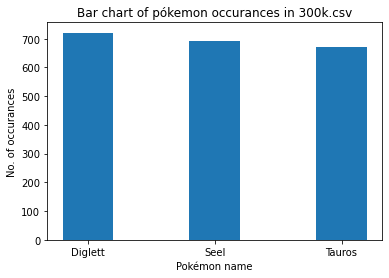

In [61]:
# YOUR CODE HERE

# Count occurances of the classes, convert to dictionary
occur = filtered_df.groupby(['class']).size().to_dict()


# Extract values from dictionary, convert class id to pokémon name for plot
keys = [name_dict[key] for key in occur.keys()]
values = occur.values()

# Creating bar chart and adding figure styles
plt.bar(keys, values, width = 0.4)
plt.xlabel("Pokémon name")
plt.ylabel("No. of occurances")
plt.title("Bar chart of pókemon occurances in 300k.csv")
plt.show()

Is the dataset balanced?

**Your answer:** (fill in here)

Plot a scatter plot where the first dimension is latitude, the second is longitude, and each point is a Pokemon. Further, the color of each point should represent which Pokemon it is. Lastly, the marker at each point should be an `'x'`. Make sure to label each axis.

Hints:

- The `scatter` method from `matplotlib` accepts an argument called `c`.
- The `scatter` method also accepts an argument called `marker`.

In [ ]:
# YOUR CODE HERE

Is there any other visualization you think would be useful? If so, insert it here.

**Your answer:** (fill in here)

How hard do you think the problem is? Which classes can/cannot be easily separated?


**Your answer:** (fill in here)

Which accuracy do you expect to achieve?

**Your answer:** (fill in here)

## 3. Preprocessing

The third step consists of processing the data before training, such as dividing the dataset into training, validation, and test sets. Some tranformations can also be applied to the dataset in order to improve the performance of the network. 

Start by creating the input and output vectors.

In [ ]:
# YOUR CODE HERE

Separate your data into training (55%), validation (25%) and test sets (20%). If you wish to apply any transformation to the dataset, do it here as well. 

In [ ]:
# YOUR CODE HERE

## 4. Training

The fourth step is where you will choose the architecture of your network (number of hidden layers, activation functions, etc.), and train it. 

Start by choosing an architecture for your network.

In [ ]:
# YOUR CODE HERE

Train the network.

In [ ]:
# YOUR CODE HERE

For you to pass this assignment, you must obtain an accuracy on the validation set greater than 50%. It may be necessary to search for a good architecture by trying several different ones. If you want a challenge, try getting an accuracy greater than 63%.

## 5. Evaluation

Once you achieved at least 50% accuracy in the validation set, we are done with training. Now we'll evaluate the performance of your classifier on the test set.

Compute the accuracy on the test set.

In [ ]:
# YOUR CODE HERE

Compute the confusion matrix of your predictions on the test set.

In [ ]:
# YOUR CODE HERE

What can you conclude from the computed accuracy and confusion matrix?

**Your answer:** (fill in here)

Visualize the decision regions of the network. Overlap it with the points corresponding to the training data, such as in Section 2, by using the scatter plot function.

Hint: A simple way to do it is to generate a lot of points within a predefined range of longitude and latitude and apply your network to it. However, feel free to explore other ways.

In [ ]:
# YOUR CODE HERE

Do the learned decision regions look like you would expect? Please comment on your results. 

**Your answer:** (fill in here)

## 6. Exploration

You have now trained and evaluated a neural network for this particular classification task. Can you provide a brief explanation as to how you could use it to decide where to travel, if you're interested in capturing the aforementioned Pokemons?

**Your answer:** (fill in here)

Is (are) there any other feature(s) from the original dataset (e.g. hour of the day, pressure, wind speed, population density, etc.) which you think would be valuable to add as an input feature to your classifier to improve its performance? 

**Your answer:** (fill in here)

To investigate your hypothesis, plot a histogram of the selected feature(s) for each one of the pokemons we're interested in. For example, if you think pressure and population density are valuable for prediction, plot 6 histograms. 3 of them will be the pressure histograms for each class ('Diglett', 'Seel' and 'Tauros'), and the other 3 will be the population density for each class.

In [ ]:
# YOUR CODE HERE

What does(do) this(ese) histogram(s) show you? Could it be beneficial to add this(ese) new feature(s) as input? Explain why/why not.

**Your answer:** (fill in here)

The purpose was this assignment was mostly to make you design a network for classification, using this Pokemon dataset as use case. However, if you want to find those three particular Pokemons, most likely using a network for classification is not the best approach. An alternative would be to perform localization by using regression instead. **Can you state some pros and cons of approach this as a regression problem instead of a classification problem?** (We do not except very detailed answers, you will pass the assignment as long as you make a reasonable attempt at explaining the pros and cons.)

**Your answer:** (fill in here)

## 7. (optional)

Assuming you found useful new features in the last part of this assignment, train a new classifier that uses these featues as well. Did the accuracy on the validation set improve? What's the highest accuracy you can achieve?

In [ ]:
# YOUR CODE HERE